In [2]:
import cv2
import os
import numpy as np
from sklearn import metrics
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.svm import SVC
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from keras.applications.vgg16 import VGG16
from sklearn.metrics import confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
#from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
from sklearn.metrics import precision_recall_fscore_support

In [3]:
data_path = os.path.join(os.path.expanduser("~"), "Downloads", "BasicTraining", "train")
img_size=256             
counter=0            
X=[]
Y=[]
 
categories=os.listdir(data_path)
 
for category in categories:                                                            # this loop to know how many images in categories
    folder_path=os.path.join(data_path,category)                                       # make folder empty has the same path for dataset
    img_names=os.listdir(folder_path)                                                  # put each image in this folder
 
    for img_name in img_names:
        img_path=os.path.join(folder_path,img_name)
        fullpath=os.path.join(data_path,category,img_name)
        try:
            img = cv2.imread(fullpath, cv2.IMREAD_COLOR)
            img = cv2.resize(img, (img_size,img_size))
            img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
            X.append(img)
            Y.append(category)
            counter+=1
            print("preprocessing Image Number==> ",counter)
        except:
            print("Error in ==> ",counter)
imgs=np.array(X)
lbls=np.array(Y)
del X
del Y
 


preprocessing Image Number==>  1
preprocessing Image Number==>  2
preprocessing Image Number==>  3
preprocessing Image Number==>  4
preprocessing Image Number==>  5
preprocessing Image Number==>  6
preprocessing Image Number==>  7
preprocessing Image Number==>  8
preprocessing Image Number==>  9
preprocessing Image Number==>  10
preprocessing Image Number==>  11
preprocessing Image Number==>  12
preprocessing Image Number==>  13
preprocessing Image Number==>  14
preprocessing Image Number==>  15
preprocessing Image Number==>  16
preprocessing Image Number==>  17
preprocessing Image Number==>  18
preprocessing Image Number==>  19
preprocessing Image Number==>  20
preprocessing Image Number==>  21
preprocessing Image Number==>  22
preprocessing Image Number==>  23
preprocessing Image Number==>  24
preprocessing Image Number==>  25
preprocessing Image Number==>  26
preprocessing Image Number==>  27
preprocessing Image Number==>  28
preprocessing Image Number==>  29
preprocessing Image Num

libpng warning: iCCP: known incorrect sRGB profile


preprocessing Image Number==>  638
preprocessing Image Number==>  639
preprocessing Image Number==>  640
preprocessing Image Number==>  641
preprocessing Image Number==>  642
preprocessing Image Number==>  643
preprocessing Image Number==>  644
preprocessing Image Number==>  645
preprocessing Image Number==>  646
preprocessing Image Number==>  647
preprocessing Image Number==>  648
preprocessing Image Number==>  649
preprocessing Image Number==>  650
preprocessing Image Number==>  651
preprocessing Image Number==>  652
preprocessing Image Number==>  653
preprocessing Image Number==>  654
preprocessing Image Number==>  655
preprocessing Image Number==>  656
preprocessing Image Number==>  657
preprocessing Image Number==>  658
preprocessing Image Number==>  659
preprocessing Image Number==>  660
preprocessing Image Number==>  661
preprocessing Image Number==>  662
preprocessing Image Number==>  663
preprocessing Image Number==>  664
preprocessing Image Number==>  665
preprocessing Image 

libpng warning: iCCP: known incorrect sRGB profile


preprocessing Image Number==>  714
preprocessing Image Number==>  715
preprocessing Image Number==>  716
preprocessing Image Number==>  717
preprocessing Image Number==>  718
preprocessing Image Number==>  719
preprocessing Image Number==>  720
preprocessing Image Number==>  721
preprocessing Image Number==>  722
preprocessing Image Number==>  723
preprocessing Image Number==>  724
preprocessing Image Number==>  725
preprocessing Image Number==>  726
preprocessing Image Number==>  727
preprocessing Image Number==>  728
preprocessing Image Number==>  729
preprocessing Image Number==>  730
preprocessing Image Number==>  731
preprocessing Image Number==>  732
preprocessing Image Number==>  733
preprocessing Image Number==>  734
preprocessing Image Number==>  735
preprocessing Image Number==>  736
preprocessing Image Number==>  737
preprocessing Image Number==>  738
preprocessing Image Number==>  739
preprocessing Image Number==>  740
preprocessing Image Number==>  741
preprocessing Image 

Corrupt JPEG data: 6 extraneous bytes before marker 0xed
libpng warning: iCCP: known incorrect sRGB profile


preprocessing Image Number==>  801
preprocessing Image Number==>  802
preprocessing Image Number==>  803
preprocessing Image Number==>  804
preprocessing Image Number==>  805
preprocessing Image Number==>  806
preprocessing Image Number==>  807
preprocessing Image Number==>  808
preprocessing Image Number==>  809
preprocessing Image Number==>  810
preprocessing Image Number==>  811
preprocessing Image Number==>  812
preprocessing Image Number==>  813
preprocessing Image Number==>  814
preprocessing Image Number==>  815
preprocessing Image Number==>  816
preprocessing Image Number==>  817
preprocessing Image Number==>  818
preprocessing Image Number==>  819
preprocessing Image Number==>  820
preprocessing Image Number==>  821
preprocessing Image Number==>  822
preprocessing Image Number==>  823
preprocessing Image Number==>  824
preprocessing Image Number==>  825
preprocessing Image Number==>  826
preprocessing Image Number==>  827
preprocessing Image Number==>  828
preprocessing Image 

In [4]:
 
#Label Encoding
le = preprocessing.LabelEncoder()
le.fit(lbls)
lbls_encoded = le.transform(lbls)
 
#Train and Test Split
train_x, test_x,train_y, test_y = train_test_split(imgs,lbls_encoded,test_size=0.1)
 
#Normalization
train_x, test_x = train_x / 255.0,  test_x / 255.0

# print(train_x)
 
 

In [5]:
"""SCNet variants"""
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.utils.model_zoo as model_zoo
import torch.quantization as quantization


__all__ = ['SCNet', 'scnet50', 'scnet101', 'scnet50_v1d', 'scnet101_v1d']

model_urls = {
    'scnet50': 'https://backseason.oss-cn-beijing.aliyuncs.com/scnet/scnet50-dc6a7e87.pth',
    'scnet50_v1d': 'https://backseason.oss-cn-beijing.aliyuncs.com/scnet/scnet50_v1d-4109d1e1.pth',
    'scnet101': 'https://backseason.oss-cn-beijing.aliyuncs.com/scnet/scnet101-44c5b751.pth',
    # 'scnet101_v1d': coming soon...
}

class SCConv(nn.Module):
    def __init__(self, inplanes, planes, stride, padding, dilation, groups, pooling_r, norm_layer):
        super(SCConv, self).__init__()
        self.k2 = nn.Sequential(
            nn.AvgPool2d(kernel_size=pooling_r, stride=pooling_r),
            nn.Conv2d(inplanes, planes, kernel_size=3, stride=1,
                      padding=padding, dilation=dilation,
                      groups=groups, bias=False),
            norm_layer(planes),
        )
        self.k3 = nn.Sequential(
            nn.Conv2d(inplanes, planes, kernel_size=3, stride=1,
                      padding=padding, dilation=dilation,
                      groups=groups, bias=False),
            norm_layer(planes),
        )
        self.k4 = nn.Sequential(
            nn.Conv2d(inplanes, planes, kernel_size=3, stride=stride,
                      padding=padding, dilation=dilation,
                      groups=groups, bias=False),
            norm_layer(planes),
        )

    def forward(self, x):
        identity = x

        k2_out = F.interpolate(self.k2(x), identity.size()[2:]) if x.size()[2] > 1 and x.size()[3] > 1 else self.k2(x)
        out = torch.sigmoid(torch.add(identity, k2_out))  # sigmoid(identity + k2)
        out = torch.mul(self.k3(x), out)  # k3 * sigmoid(identity + k2)
        out = self.k4(out)  # k4

        return out


class SCBottleneck(nn.Module):
    """SCNet SCBottleneck
    """
    expansion = 4
    pooling_r = 4 # down-sampling rate of the avg pooling layer in the K3 path of SC-Conv.

    def __init__(self, inplanes, planes, stride=1, downsample=None,
                 cardinality=1, bottleneck_width=32,
                 avd=False, dilation=1, is_first=False,
                 norm_layer=None):
        super(SCBottleneck, self).__init__()
        group_width = int(planes * (bottleneck_width / 64.)) * cardinality
        self.conv1_a = nn.Conv2d(inplanes, group_width, kernel_size=1, bias=False)
        self.bn1_a = norm_layer(group_width)
        self.conv1_b = nn.Conv2d(inplanes, group_width, kernel_size=1, bias=False)
        self.bn1_b = norm_layer(group_width)
        self.avd = avd and (stride > 1 or is_first)

        if self.avd:
            self.avd_layer = nn.AvgPool2d(3, stride, padding=1
                                          )
            stride = 1

        self.k1 = nn.Sequential(
                    nn.Conv2d(
                        group_width, group_width, kernel_size=3, stride=stride,
                        padding=dilation, dilation=dilation,
                        groups=cardinality, bias=False),
                    norm_layer(group_width),
                    )

        self.scconv = SCConv(
            group_width, group_width, stride=stride,
            padding=dilation, dilation=dilation,
            groups=cardinality, pooling_r=self.pooling_r, norm_layer=norm_layer)

        self.conv3 = nn.Conv2d(
            group_width * 2, planes * 4, kernel_size=1, bias=False)
        self.bn3 = norm_layer(planes*4)

        self.relu = nn.ReLU(inplace=True)
        self.downsample = downsample
        self.dilation = dilation
        self.stride = stride

    def forward(self, x):
        residual = x

        out_a= self.conv1_a(x)
        out_a = self.bn1_a(out_a)
        out_b = self.conv1_b(x)
        out_b = self.bn1_b(out_b)
        out_a = self.relu(out_a)
        out_b = self.relu(out_b)

        out_a = self.k1(out_a)
        out_b = self.scconv(out_b)
        out_a = self.relu(out_a)
        out_b = self.relu(out_b)

        if self.avd:
            out_a = self.avd_layer(out_a)
            out_b = self.avd_layer(out_b)

        out = self.conv3(torch.cat([out_a, out_b], dim=1))
        out = self.bn3(out)

        if self.downsample is not None:
            residual = self.downsample(x)

        out += residual
        out = self.relu(out)

        return out

class SCNet(nn.Module):
    def __init__(self, block, layers, groups=1, bottleneck_width=32,
                 num_classes=1000, dilated=False, dilation=1,
                 deep_stem=False, stem_width=64, avg_down=False,
                 avd=False, norm_layer=nn.BatchNorm2d):
        self.cardinality = groups
        self.bottleneck_width = bottleneck_width
        # ResNet-D params
        self.inplanes = stem_width*2 if deep_stem else 64
        self.avg_down = avg_down
        self.avd = avd

        super(SCNet, self).__init__()
        conv_layer = nn.Conv2d
        if deep_stem:
            self.conv1 = nn.Sequential(
                conv_layer(3, stem_width, kernel_size=3, stride=2, padding=1, bias=False),
                norm_layer(stem_width),
                nn.ReLU(inplace=True),
                conv_layer(stem_width, stem_width, kernel_size=3, stride=1, padding=1, bias=False),
                norm_layer(stem_width),
                nn.ReLU(inplace=True),
                conv_layer(stem_width, stem_width*2, kernel_size=3, stride=1, padding=1, bias=False),
            )
        else:
            self.conv1 = conv_layer(3, 64, kernel_size=7, stride=2, padding=3,
                                   bias=False)
        self.bn1 = norm_layer(self.inplanes)
        self.relu = nn.ReLU(inplace=True)
        self.maxpool = nn.MaxPool2d(kernel_size=3, stride=2, padding=1)
        self.layer1 = self._make_layer(block, 64, layers[0], norm_layer=norm_layer, is_first=False)
        self.layer2 = self._make_layer(block, 128, layers[1], stride=2, norm_layer=norm_layer)
        if dilated or dilation == 4:
            self.layer3 = self._make_layer(block, 256, layers[2], stride=1,
                                           dilation=2, norm_layer=norm_layer)
            self.layer4 = self._make_layer(block, 512, layers[3], stride=1,
                                           dilation=4, norm_layer=norm_layer)
        elif dilation==2:
            self.layer3 = self._make_layer(block, 256, layers[2], stride=2,
                                           dilation=1, norm_layer=norm_layer)
            self.layer4 = self._make_layer(block, 512, layers[3], stride=1,
                                           dilation=2, norm_layer=norm_layer)
        else:
            self.layer3 = self._make_layer(block, 256, layers[2], stride=2,
                                           norm_layer=norm_layer)
            self.layer4 = self._make_layer(block, 512, layers[3], stride=2,
                                           norm_layer=norm_layer)
        self.avgpool = nn.AdaptiveAvgPool2d((1, 1))
        self.fc = nn.Linear(512 * block.expansion, num_classes)

        for m in self.modules():
            if isinstance(m, nn.Conv2d):
                nn.init.kaiming_normal_(m.weight, mode='fan_out', nonlinearity='relu')
            elif isinstance(m, norm_layer):
                nn.init.constant_(m.weight, 1)
                nn.init.constant_(m.bias, 0)

    def _make_layer(self, block, planes, blocks, stride=1, dilation=1, norm_layer=None,
                    is_first=True):
        downsample = None
        if stride != 1 or self.inplanes != planes * block.expansion:
            down_layers = []
            if self.avg_down:
                if dilation == 1:
                    down_layers.append(nn.AvgPool2d(kernel_size=stride, stride=stride,
                                                    ceil_mode=True, count_include_pad=False))
                else:
                    down_layers.append(nn.AvgPool2d(kernel_size=1, stride=1,
                                                    ceil_mode=True, count_include_pad=False))
                down_layers.append(nn.Conv2d(self.inplanes, planes * block.expansion,
                                             kernel_size=1, stride=1, bias=False))
            else:
                down_layers.append(nn.Conv2d(self.inplanes, planes * block.expansion,
                                             kernel_size=1, stride=stride, bias=False))
            down_layers.append(norm_layer(planes * block.expansion))
            downsample = nn.Sequential(*down_layers)

        layers = []
        if dilation == 1 or dilation == 2:
            layers.append(block(self.inplanes, planes, stride, downsample=downsample,
                                cardinality=self.cardinality,
                                bottleneck_width=self.bottleneck_width,
                                avd=self.avd, dilation=1, is_first=is_first,
                                norm_layer=norm_layer))
        elif dilation == 4:
            layers.append(block(self.inplanes, planes, stride, downsample=downsample,
                                cardinality=self.cardinality,
                                bottleneck_width=self.bottleneck_width,
                                avd=self.avd, dilation=2, is_first=is_first,
                                norm_layer=norm_layer))
        else:
            raise RuntimeError("=> unknown dilation size: {}".format(dilation))

        self.inplanes = planes * block.expansion
        for i in range(1, blocks):
            layers.append(block(self.inplanes, planes,
                                cardinality=self.cardinality,
                                bottleneck_width=self.bottleneck_width,
                                avd=self.avd, dilation=dilation,
                                norm_layer=norm_layer))

        return nn.Sequential(*layers)

    def forward(self, x):
        x = self.conv1(x)
        x = self.bn1(x)
        x = self.relu(x)
        x = self.maxpool(x)

        x = self.layer1(x)
        x = self.layer2(x)
        x = self.layer3(x)
        x = self.layer4(x)

        x = self.avgpool(x)
        x = x.view(x.size(0), -1)
        x = self.fc(x)

        return x


def scnet50(pretrained=False, **kwargs):
    """Constructs a SCNet-50 model.
    Args:
        pretrained (bool): If True, returns a model pre-trained on ImageNet
    """
    model = SCNet(SCBottleneck, [3, 4, 6, 3],
                deep_stem=False, stem_width=32, avg_down=False,
                avd=False, **kwargs)
    if pretrained:
        model.load_state_dict(model_zoo.load_url(model_urls['scnet50']))
    return model

In [6]:
#Final 1

import os
import numpy as np
import torch
from torch.utils.data import DataLoader
from torchvision import transforms
#from torchvision.models import resnet50
from sklearn.metrics import accuracy_score
import keras
from torchvision.datasets import ImageFolder

# Assuming 'train_data_path' is the path to your training data
data_path = os.path.join(os.path.expanduser("~"), "Downloads", "BasicTraining", "train")

# Use GPU if available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Data preprocessing and loading
transform = transforms.Compose([
    transforms.Resize((256, 256)),
    transforms.ToTensor(),
])

train_dataset = ImageFolder(data_path, transform=transform)

train_size = int(0.8 * len(train_dataset))
val_size = len(train_dataset) - train_size
train_dataset, val_dataset = torch.utils.data.random_split(train_dataset, [train_size, val_size])

# Data loaders
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False)


sc_model = scnet50(pretrained=True).to(device)
sc_model.eval()

# Feature extraction for training set
ann_features_train = []
train_labels = []
with torch.no_grad():
    for inputs, labels in train_loader:
        inputs = inputs.to(device)
        features = sc_model(inputs)
        ann_features_train.append(features.cpu().numpy())
        train_labels.extend(labels.numpy())

ann_features_train = np.concatenate(ann_features_train, axis=0)

# Feature extraction for validation set
ann_features_val = []
val_labels = []
with torch.no_grad():
    for inputs, labels in val_loader:
        inputs = inputs.to(device)
        features = sc_model(inputs)
        ann_features_val.append(features.cpu().numpy())
        val_labels.extend(labels.numpy())

ann_features_val = np.concatenate(ann_features_val, axis=0)

# Convert labels to numpy arrays
train_labels_np = np.array(train_labels)
val_labels_np = np.array(val_labels)

# Define a simple neural network model using Keras
model = keras.models.Sequential([
    keras.layers.Flatten(),
    keras.layers.Dense(256, activation="relu"),
    keras.layers.Dense(128, activation="relu"),
    keras.layers.Dense(7, activation="softmax")  # Adjust based on the number of output classes
])

# Compile the model
model.compile(loss="sparse_categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

# Train the model
model.fit(ann_features_train, train_labels_np, epochs=5, validation_data=(ann_features_val, val_labels_np))

# # Feature extraction for test set
# ann_features_test = []
# test_labels = []
# with torch.no_grad():
#     for inputs, labels in val_loader:  # Change to your test loader
#         inputs = inputs.to(device)
#         features = model(inputs)
#         ann_features_test.append(features.cpu().numpy())
#         test_labels.extend(labels.numpy())

# ann_features_test = np.concatenate(ann_features_test, axis=0)

# # Convert test labels to numpy array
# test_labels_np = np.array(test_labels)

# # Evaluate the model
# y_preds = model.predict(ann_features_test).argmax(axis=1)
# accuracy = accuracy_score(test_labels_np, y_preds)
# print("Accuracy:", accuracy)


Epoch 1/5
59/59 [==============================] - 0s 3ms/step - loss: 0.1893 - accuracy: 0.9391 - val_loss: 0.0960 - val_accuracy: 0.9634
Epoch 2/5
59/59 [==============================] - 0s 1ms/step - loss: 0.0349 - accuracy: 0.9838 - val_loss: 0.0882 - val_accuracy: 0.9656
Epoch 3/5
59/59 [==============================] - 0s 2ms/step - loss: 0.0226 - accuracy: 0.9892 - val_loss: 0.0845 - val_accuracy: 0.9699
Epoch 4/5
59/59 [==============================] - 0s 1ms/step - loss: 0.0310 - accuracy: 0.9876 - val_loss: 0.1053 - val_accuracy: 0.9677
Epoch 5/5
59/59 [==============================] - 0s 2ms/step - loss: 0.0850 - accuracy: 0.9779 - val_loss: 0.1809 - val_accuracy: 0.9613


In [7]:
y_preds = model.predict(ann_features_val).argmax(axis=1)
Accuracy = accuracy_score(val_labels_np,y_preds)
print("Accuracy :", Accuracy)

15/15 [==============================] - 0s 625us/step
Accuracy : 0.9612903225806452


In [30]:
torch.save(model.state_dict(), 'Object_detection.pth')
print('Model saved.')

Model saved.


In [8]:
test_y_Normal = le.inverse_transform(val_labels_np)


In [40]:
from tkinter import *
import tkinter as tk
from tkinter import filedialog
from tkinter.filedialog import askopenfilename
import cv2
import numpy as np
from PIL import Image, ImageTk
from sklearn.preprocessing import LabelEncoder

# Assuming your class names are stored in a list or array
class_names = ["Cars", "Flowers", "Fruits", "Mask", "Men", "Traffic Sign", "Women"]

le = LabelEncoder()
le.fit(class_names)

# Replace '...' with the actual path to your scnet model file
scnet_model_path = os.path.join(os.path.expanduser("~"), "Downloads", "scnet50_model.pth")

# Load your SCNet model
# You need to modify this part based on your SCNet model loading code
# Example: scnet_model = load_your_scnet_model_function(scnet_model_path)

root = tk.Tk()
root.geometry("1250x950")  # Size of the window
root.resizable(width=True, height=True)
root.title('AI project')

root['background'] = '#263d23'
my_font1 = ('Helvetica', 25, 'bold')
my_font2 = ('Verdana', 15, 'bold')
label = tk.Label(root, text='Upload Files & Detect', width=30, font=my_font1)
label.grid(row=1, column=1)
label.place(anchor=CENTER, relx=.5, rely=.025)

root2 = tk.Button(root, text='Press me To Upload Images',
                  width=25, command=lambda: upload_file())
root2.grid(row=2, column=1, pady=5)
root2.place(anchor=CENTER, relx=.5, rely=.070)


def upload_file():
    f_types = [('Jpg Files', '.jpg'), ('PNG Files', '.png'), ('Jpeg Files', '*.jpeg')]
    filename = filedialog.askopenfilenames(filetypes=f_types)
    
    col = 1
    row = 3
    
    for pathgui in filename:
        img = Image.open(pathgui)
        list_of_images = []
        
        preprocessed = cv2.imread(pathgui, cv2.IMREAD_COLOR)
        preprocessed = cv2.resize(preprocessed, (img_size, img_size))
        preprocessed = cv2.cvtColor(preprocessed, cv2.COLOR_BGR2RGB)
        list_of_images.append(preprocessed)
        
        arr = np.array(list_of_images)
        tensor_input = torch.from_numpy(arr).permute(0, 3, 1, 2).float().div(255.0).to(device)

        with torch.no_grad():
            features_input = model(tensor_input)

        # Class prediction
        prediction_input = torch.argmax(features_input).item()
        if prediction_input not in le.classes_:
            prediction_input_Normal = ["Unknown"]
        else:
            prediction_input_Normal = le.inverse_transform([prediction_input])
        #prediction_input_Normal = le.inverse_transform([prediction_input])
        
        img = img.resize((150, 150))
        img = ImageTk.PhotoImage(img)
        
        root1 = tk.Label(root)
        root1.grid(row=row, column=col, pady=100, padx=10)
        root1.image = img
        
        text_answer = prediction_input_Normal[0]
        xz = tk.Label(root, text=text_answer, width=10, font=my_font2)
        xz.grid(row=row + 1, column=col, pady=0, padx=10)
        
        root1['image'] = img
        if col == 7:
            row = row + 2
            col = 1
        else:
            col = col + 1

root.mainloop()


/var/folders/sm/w93dc1mn2sn2x1jy6lk5hsfm0000gn/T/ipykernel_78916/1412473805.py:65: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if prediction_input not in le.classes_:


[[80  0  0  0  0  0  0]
 [ 0 83  1  0  0  0  0]
 [ 0  0 77  0  0  0  0]
 [ 0  0  0 46  0  0  1]
 [ 0  0  0  0 28  0 14]
 [ 0  0  0  0  0 86  0]
 [ 0  0  0  1  1  0 47]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        80
           1       1.00      0.99      0.99        84
           2       0.99      1.00      0.99        77
           3       0.98      0.98      0.98        47
           4       0.97      0.67      0.79        42
           5       1.00      1.00      1.00        86
           6       0.76      0.96      0.85        49

    accuracy                           0.96       465
   macro avg       0.96      0.94      0.94       465
weighted avg       0.97      0.96      0.96       465



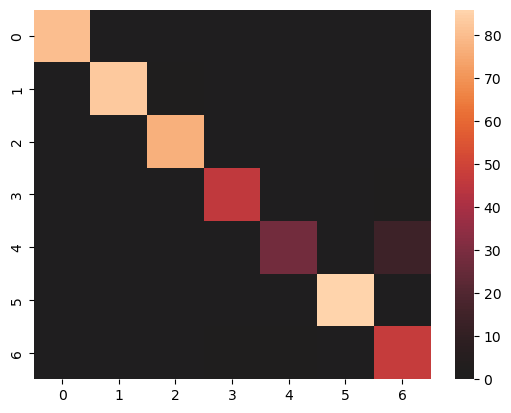

In [42]:
cm=confusion_matrix(val_labels_np, y_preds)
print(cm)
print(classification_report(val_labels_np, y_preds))
# drawing confusion matrix
sns.heatmap(cm, center = True)
plt.show()

AUC Value  :  0.9696085164835164


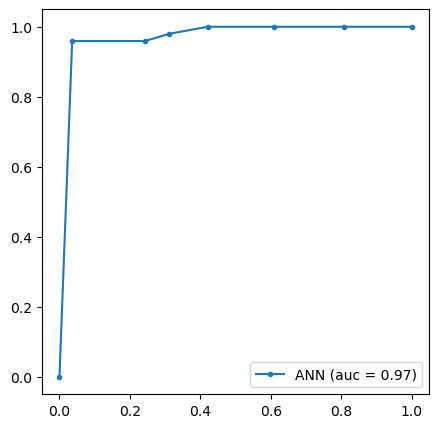

In [43]:
#Calculating ROC:  
#roc_curve(y_test, y_pred, pos_label=None, sample_weight=None,drop_intermediate=True)

fprValue, tprValue, thresholdsValue = roc_curve(val_labels_np,y_preds,pos_label=6)
#print('fpr Value  : ', fprValue)
#print('tpr Value  : ', tprValue)
#print('thresholds Value  : ', thresholdsValue)

#Calculating Area Under the Curve AUC :  

fprValue2, tprValue2, thresholdsValue2 = roc_curve(val_labels_np,y_preds,pos_label=6 )
AUCValue = auc(fprValue2, tprValue2)
print('AUC Value  : ', AUCValue)
plt.show()

plt.figure(figsize=(5, 5), dpi=100)
plt.plot(fprValue,tprValue, marker='.', label='ANN (auc = %0.2f)' % AUCValue)
plt.legend()
plt.show()
